# House Sales in King County, USA

In [1]:
import numpy as np 
import pandas as pd

# plotly
import plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# seaborn
import seaborn as sns

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

In [2]:
kc = pd.read_csv('kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
kc.waterfront.unique()

array([0, 1])

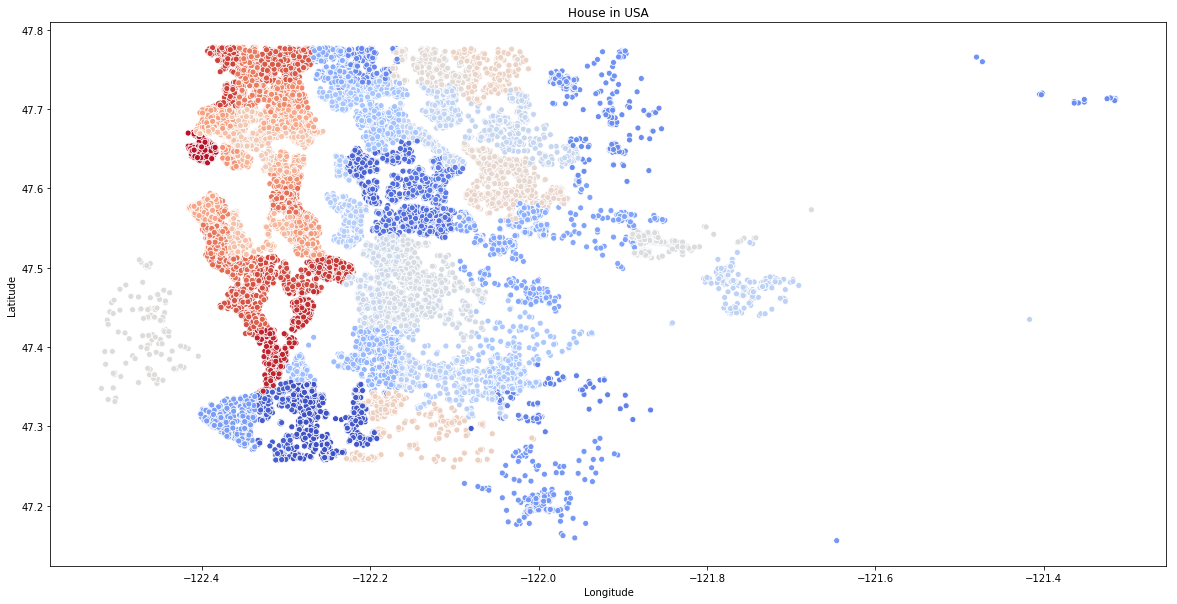

In [6]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='long', y='lat', data=kc,
                hue="zipcode", 
                legend=False, 
                palette=sns.color_palette('coolwarm', n_colors=len(kc.zipcode.unique())));

plt.title('House in USA')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

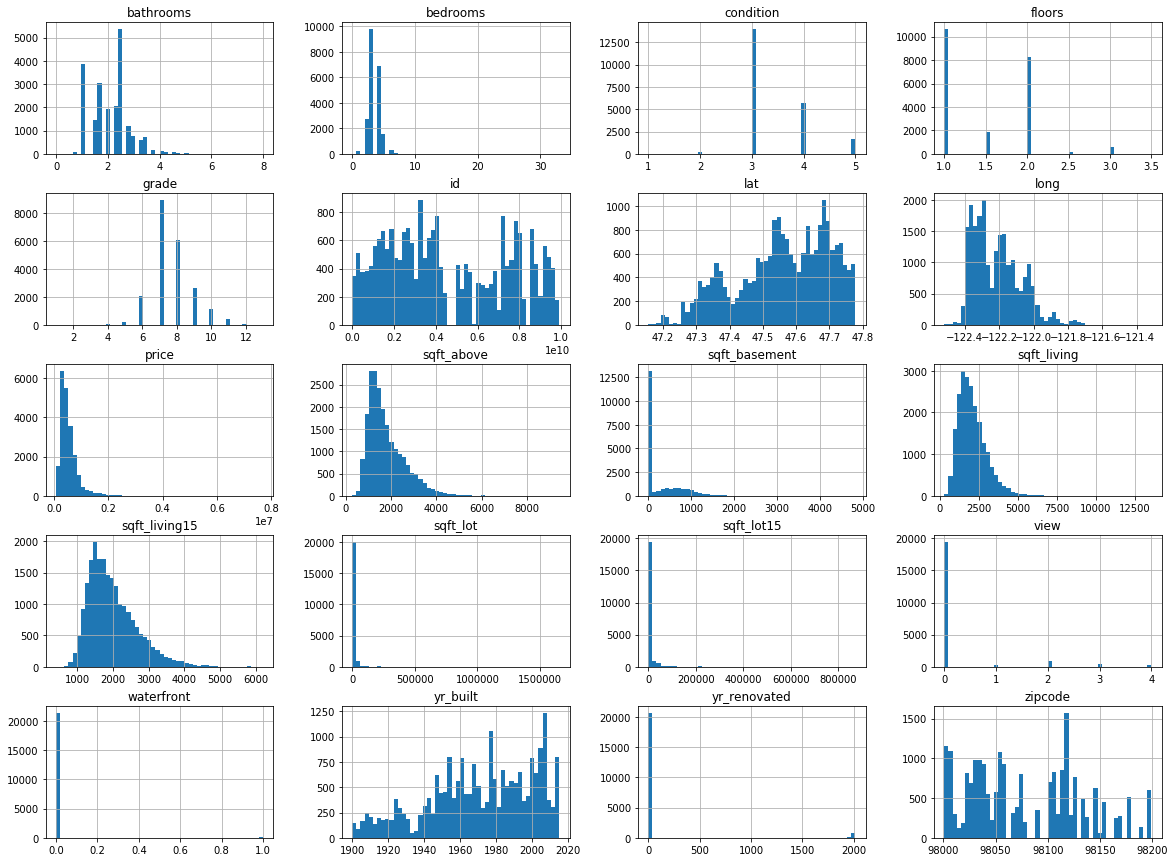

In [7]:
kc.hist(bins=50, figsize=(20,15));

In [8]:
kc.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [9]:
kc.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [10]:
kc.condition.unique()

array([3, 5, 4, 1, 2])

In [11]:
kc.view.unique()

array([0, 3, 4, 2, 1])

In [12]:
kc.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [13]:
kc.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Create a Test Set

In [15]:
(kc['zipcode'].value_counts() / len(kc))[:10]

98103    0.027854
98038    0.027298
98115    0.026975
98052    0.026558
98117    0.025586
98042    0.025355
98034    0.025216
98118    0.023504
98023    0.023088
98006    0.023042
Name: zipcode, dtype: float64

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified shuffle split gives the index set of splited data in train/test sets. 
# The frequency of each class in each fold have a same ratio with the ration of each class in all dataset.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(kc, kc["zipcode"]):
    strat_train_set = kc.loc[train_index]
    strat_test_set = kc.loc[test_index]

In [17]:
strat_train_set.shape

(17290, 21)

In [18]:
strat_test_set.shape

(4323, 21)

In [19]:
strat_test_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6634,1853200190,20141103T000000,612000.0,4,2.50,2670,5974,2.0,0,0,...,8,2670,0,1999,0,98034,47.7122,-122.231,2140,5729
17182,7883601155,20140530T000000,240000.0,3,2.00,1330,6000,1.0,0,0,...,7,630,700,1900,0,98108,47.5255,-122.327,1140,6000
4687,7226000110,20140726T000000,205000.0,2,1.00,900,4397,1.0,0,0,...,6,900,0,1918,0,98055,47.4851,-122.205,1430,4500
4597,3630030110,20140616T000000,534500.0,3,2.50,1700,3150,2.0,0,0,...,8,1700,0,2005,0,98029,47.5505,-121.998,1700,3600
1299,8648220260,20150324T000000,284000.0,3,1.75,1530,9600,1.0,0,0,...,7,1200,330,1988,0,98042,47.3594,-122.076,1680,9680


In [20]:
(strat_test_set['zipcode'].value_counts() / len(strat_test_set))[:10]

98103    0.027759
98038    0.027296
98115    0.027065
98052    0.026602
98117    0.025677
98042    0.025445
98034    0.025214
98118    0.023595
98023    0.023132
98006    0.023132
Name: zipcode, dtype: float64

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("zipcode", axis=1, inplace=True)
    set_.drop("id", axis=1, inplace=True)
    set_.drop("sqft_living", axis=1, inplace=True)
    set_.drop("sqft_lot", axis=1, inplace=True)
    set_.drop("sqft_above", axis=1, inplace=True)
    set_.drop("sqft_basement", axis=1, inplace=True)
    set_.drop("sqft_living15", axis=1, inplace=True)
    set_.drop("sqft_lot15", axis=1, inplace=True)
    set_.drop("yr_renovated", axis=1, inplace=True)
    set_.drop("date", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [23]:
housing = strat_train_set.copy()

In [24]:
corr_matrix = housing.corr()

In [25]:
# how much each attribute correlates with the house value:
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
grade         0.671068
bathrooms     0.528114
view          0.400001
lat           0.306991
bedrooms      0.306878
floors        0.259945
waterfront    0.255035
yr_built      0.059515
condition     0.035273
long          0.017380
Name: price, dtype: float64

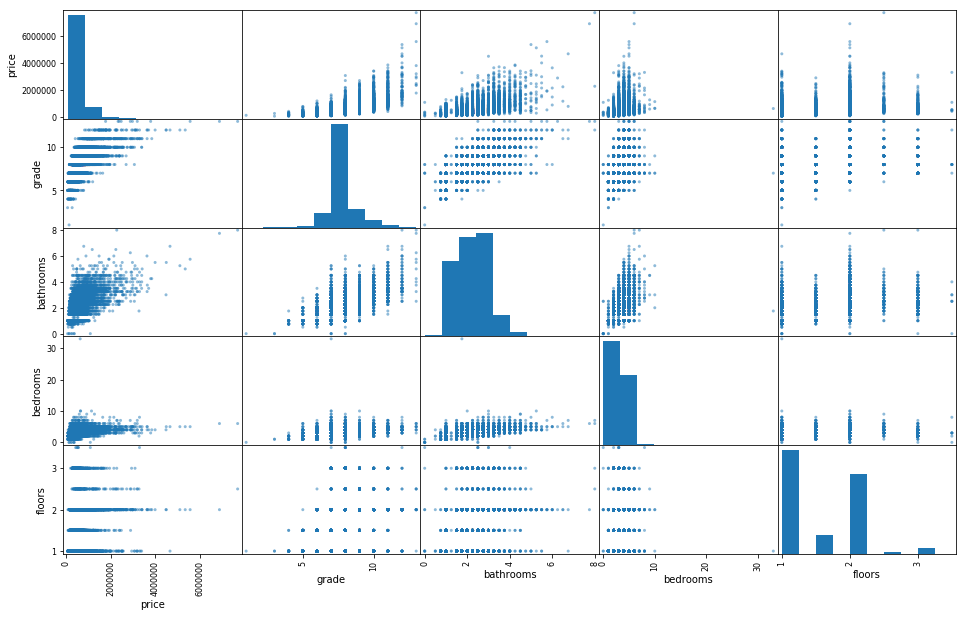

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["price", "grade", "bathrooms", "bedrooms", "floors" ]
scatter_matrix(housing[attributes], figsize=(16, 10));

Based on `waterfront` and `view` data, It seems like they don't affect the house value too much.  

## Data Wragling

In [30]:
strat_test_set.describe()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,lat,long
count,4.323000e+03,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,5.408746e+05,3.365718,2.114562,1.489706,0.006940,0.225307,3.415452,7.659496,1971.174879,47.560004,-122.214539
std,3.715700e+05,0.913014,0.768995,0.534508,0.083024,0.747749,0.649253,1.172804,29.289432,0.138865,0.140058
min,8.100000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1900.000000,47.176400,-122.503000
25%,3.200000e+05,3.000000,1.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1952.000000,47.470800,-122.327500
50%,4.500000e+05,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,47.571900,-122.231000
75%,6.437500e+05,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,47.677950,-122.126000
max,7.062500e+06,11.000000,7.500000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,47.777500,-121.315000


In [29]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 15241 to 7376
Data columns (total 11 columns):
price         17290 non-null float64
bedrooms      17290 non-null int64
bathrooms     17290 non-null float64
floors        17290 non-null float64
waterfront    17290 non-null int64
view          17290 non-null int64
condition     17290 non-null int64
grade         17290 non-null int64
yr_built      17290 non-null int64
lat           17290 non-null float64
long          17290 non-null float64
dtypes: float64(5), int64(6)
memory usage: 1.6 MB


In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.bathrooms = set_.bathrooms.astype('int64')
    set_.floors = set_.floors.astype('int64')

In [34]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 15241 to 7376
Data columns (total 11 columns):
price         17290 non-null float64
bedrooms      17290 non-null int64
bathrooms     17290 non-null int64
floors        17290 non-null int64
waterfront    17290 non-null int64
view          17290 non-null int64
condition     17290 non-null int64
grade         17290 non-null int64
yr_built      17290 non-null int64
lat           17290 non-null float64
long          17290 non-null float64
dtypes: float64(3), int64(8)
memory usage: 1.6 MB


In [35]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 6634 to 1884
Data columns (total 11 columns):
price         4323 non-null float64
bedrooms      4323 non-null int64
bathrooms     4323 non-null int64
floors        4323 non-null int64
waterfront    4323 non-null int64
view          4323 non-null int64
condition     4323 non-null int64
grade         4323 non-null int64
yr_built      4323 non-null int64
lat           4323 non-null float64
long          4323 non-null float64
dtypes: float64(3), int64(8)
memory usage: 405.3 KB


## Prepare the Data for Machine Learning Algorithms

In [47]:
housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set["price"].copy()

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [40]:
view = housing.view.values

In [41]:
view_hot = encoder.fit_transform(view.reshape(-1,1))

In [42]:
view_hot

<17290x5 sparse matrix of type '<class 'numpy.float64'>'
	with 17290 stored elements in Compressed Sparse Row format>

In [43]:
grade = housing.grade.values

In [44]:
grade_hot = encoder.fit_transform(grade.reshape(-1,1))
grade_hot

<17290x12 sparse matrix of type '<class 'numpy.float64'>'
	with 17290 stored elements in Compressed Sparse Row format>

In [45]:
condition = housing.condition.values

In [46]:
condition_hot = encoder.fit_transform(condition.reshape(-1, 1))
condition_hot

<17290x5 sparse matrix of type '<class 'numpy.float64'>'
	with 17290 stored elements in Compressed Sparse Row format>

### Transformation Pipelines

In [50]:
from sklearn.pipeline import Pipeline

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names, include=True):
        self.attribute_names = attribute_names
        self.include = include
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.include:
            return X[self.attribute_names].values
        else:
            return X.drop(self.attribute_names, axis=1).values

In [134]:
view_pipeline = Pipeline([
        ('selector_view', DataFrameSelector(["view"])),
        ('onehotencoder_view', OneHotEncoder())
 ])

In [135]:
grade_pipeline = Pipeline([
        ('selector_grade', DataFrameSelector(["grade"])),
        ('onehotencoder_grade', OneHotEncoder())
 ])

In [136]:
cond_pipeline = Pipeline([
        ('selector_cond', DataFrameSelector(["condition"])),
        ('onehotencoder_cond', OneHotEncoder())
 ])

In [137]:
rest_pipeline = Pipeline([
        ('selector_rest', DataFrameSelector(["view", "grade","condition"],include=False))
 ])

In [138]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("rest_pipeline", rest_pipeline),
        ("view_pipeline", view_pipeline),
        ("grade_pipeline", grade_pipeline),
        ("cond_pipeline", cond_pipeline)
])

In [142]:
housing.shape

(17290, 10)

In [139]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<17290x29 sparse matrix of type '<class 'numpy.float64'>'
	with 155666 stored elements in Compressed Sparse Row format>

In [140]:
housing_prepared.toarray()

array([[ 3.,  2.,  2., ...,  1.,  0.,  0.],
       [ 3.,  2.,  2., ...,  1.,  0.,  0.],
       [ 3.,  2.,  1., ...,  1.,  0.,  0.],
       ..., 
       [ 3.,  1.,  1., ...,  0.,  1.,  0.],
       [ 3.,  2.,  2., ...,  0.,  1.,  0.],
       [ 3.,  1.,  1., ...,  0.,  0.,  0.]])

## Select and Train a Model

In [144]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() ##########

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [145]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [146]:
lin_rmse

201889.41113610961

In [147]:
lin_reg.score(housing_prepared, housing_labels)

0.69573915672712738

In [148]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() ##########

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [149]:
>>> housing_predictions = tree_reg.predict(housing_prepared)
>>> tree_mse = mean_squared_error(housing_labels, housing_predictions)
>>> tree_rmse = np.sqrt(tree_mse)
>>> tree_rmse

10257.885293499448

In [150]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor() ###########

forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [151]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

65780.948050989304

## Fine-Tune Your Model

In [152]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor() #########

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'bootstrap': [False], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [153]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [154]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [155]:
grid_search.best_score_

-23497469133.334106

In [156]:
cvres = grid_search.cv_results_

In [159]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

196317.802974 {'n_estimators': 3, 'max_features': 2}
176277.23972 {'n_estimators': 10, 'max_features': 2}
164561.320358 {'n_estimators': 30, 'max_features': 2}
192300.190584 {'n_estimators': 3, 'max_features': 4}
165861.466238 {'n_estimators': 10, 'max_features': 4}
160463.505947 {'n_estimators': 30, 'max_features': 4}
185999.895191 {'n_estimators': 3, 'max_features': 6}
166144.93758 {'n_estimators': 10, 'max_features': 6}
155929.029055 {'n_estimators': 30, 'max_features': 6}
181920.329213 {'n_estimators': 3, 'max_features': 8}
158298.401167 {'n_estimators': 10, 'max_features': 8}
153288.842168 {'n_estimators': 30, 'max_features': 8}
194765.789448 {'n_estimators': 3, 'bootstrap': False, 'max_features': 2}
169673.850947 {'n_estimators': 10, 'bootstrap': False, 'max_features': 2}
181975.028517 {'n_estimators': 3, 'bootstrap': False, 'max_features': 3}
170184.048109 {'n_estimators': 10, 'bootstrap': False, 'max_features': 3}
185717.79845 {'n_estimators': 3, 'bootstrap': False, 'max_featur

In [160]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  3.80955870e-02,   1.48574069e-01,   1.51258498e-02,
         2.19897591e-02,   6.95326973e-02,   2.01786983e-01,
         9.54465909e-02,   4.55226086e-02,   2.32639916e-03,
         3.19773990e-03,   3.83476886e-03,   4.03974875e-02,
         2.50772790e-07,   7.20293113e-06,   9.40431238e-05,
         9.93612494e-04,   1.35698240e-02,   3.68415282e-02,
         3.13573858e-02,   3.07759000e-02,   4.55857101e-02,
         6.93724424e-02,   3.80327522e-02,   2.69100493e-02,
         3.95581548e-04,   5.22031246e-04,   9.28955208e-03,
         5.10348747e-03,   5.31810626e-03])

### Evaluate Your System on the Test Set

In [161]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

In [162]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to 47,766.0
final_rmse

164530.19782944914